# Time Series Analysis: ACF and PACF

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [2]:
df_ice = pd.read_csv('ice_cream.csv')
df_ice.head()

,DATE,IPN31152N
0,1972-01-01,59.9622
1,1972-02-01,67.0605
2,1972-03-01,74.2350
3,1972-04-01,78.1120
4,1972-05-01,84.7636


In [4]:
#renaming columns
df_ice.rename(columns = {'DATE':'date', 'IPN31152N': 'production'}, inplace = True)

In [5]:
# convert date column to datetime type
df_ice['date'] = pd.to_datetime(df_ice['date'])

In [6]:
#set date as index
df_ice.set_index('date', inplace = True)

In [12]:
# get the subset of the data
start_date = pd.to_datetime('2011-01-01')
df_ice = df_ice[start_date:]

In [13]:
df_ice.head()

,production
date,
2011-01-01,92.6110
2011-02-01,106.1656
2011-03-01,114.2484
2011-04-01,116.6234
2011-05-01,116.1365


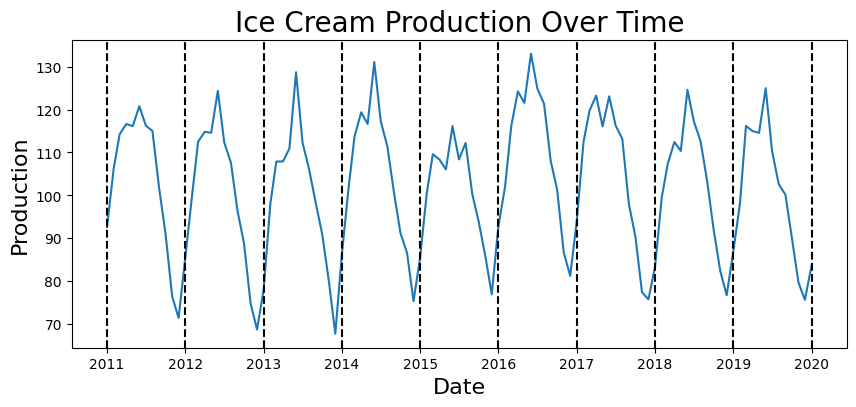

In [14]:
plt.figure(figsize = (10,4))
plt.plot(df_ice['production'])
plt.title("Ice Cream Production Over Time", fontsize = 20)
plt.ylabel('Production', fontsize = 16)
plt.xlabel('Date', fontsize = 16)
for year in range(2011,2021):
  plt.axvline(pd.to_datetime(f'{year}-01-01'), color = 'k', linestyle = '--')
plt.show()

## ACF

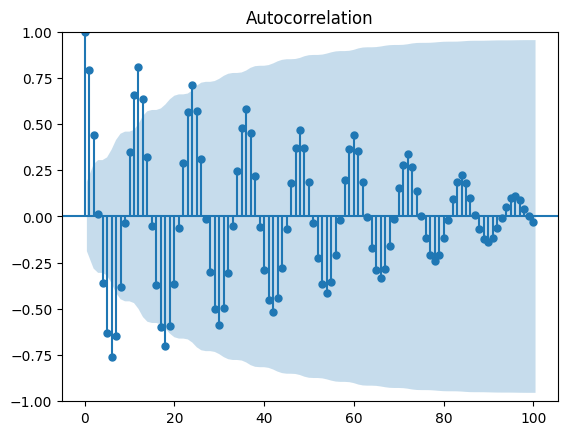

In [17]:
  acf_plot = plot_acf(df_ice.production, lags = 100)

## PACF

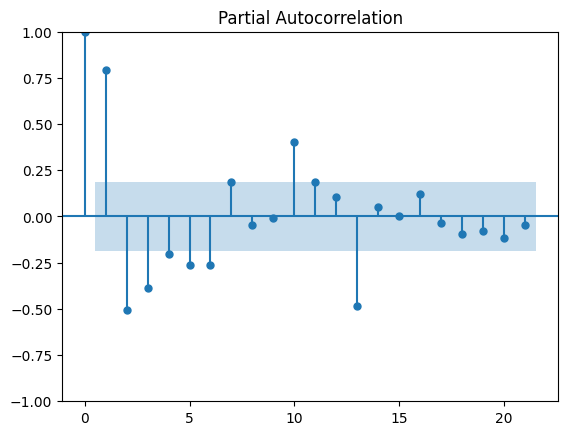

In [19]:
pacf_plot = plot_pacf(df_ice.production)

## On Stock data

In [20]:
import yfinance as yf

In [21]:
tickerSymbol = 'SPY'

In [22]:
tickerData = yf.Ticker(tickerSymbol)

In [27]:
tickerdf = tickerData.history(period = '1d', start = '2015-1-1', end = '2024-1-1')

In [28]:
tickerdf = tickerdf[['Close']]

In [29]:
tickerdf.head()

,Close
Date,
2015-01-02 00:00:00-05:00,173.173752
2015-01-05 00:00:00-05:00,170.046280
2015-01-06 00:00:00-05:00,168.444656
2015-01-07 00:00:00-05:00,170.543640
2015-01-08 00:00:00-05:00,173.569962


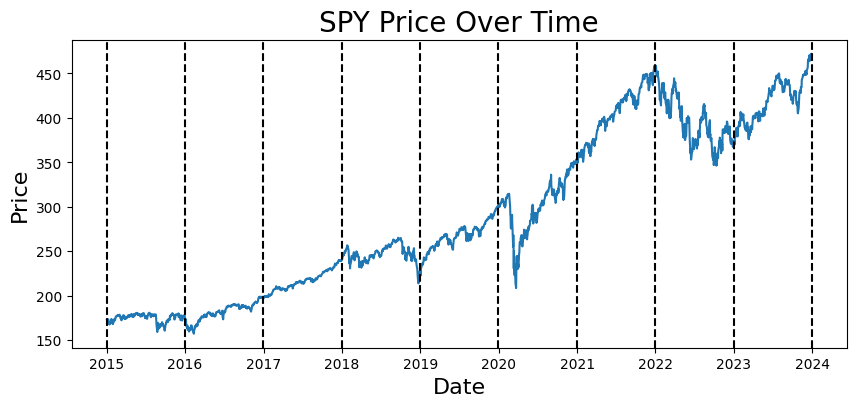

In [30]:
  plt.figure(figsize = (10,4))
  plt.plot(tickerdf['Close'])
  plt.title("SPY Price Over Time", fontsize = 20)
  plt.ylabel('Price', fontsize = 16)
  plt.xlabel('Date', fontsize = 16)
  for year in range(2015,2025):
    plt.axvline(pd.to_datetime(f'{year}-01-01'), color = 'k', linestyle = '--')
  plt.show()

## Stationary: take first difference of this series

In [33]:
# take first difference
first_diffs = tickerdf.Close.values[1:]- tickerdf.Close.values[:-1]
first_diffs = np.concatenate([first_diffs, [0]])

In [35]:
tickerdf['first_difference'] = first_diffs

In [36]:
tickerdf.head()

,Close,first_difference
Date,,
2015-01-02 00:00:00-05:00,173.173752,-3.127472
2015-01-05 00:00:00-05:00,170.046280,-1.601624
2015-01-06 00:00:00-05:00,168.444656,2.098984
2015-01-07 00:00:00-05:00,170.543640,3.026321
2015-01-08 00:00:00-05:00,173.569962,-1.390976


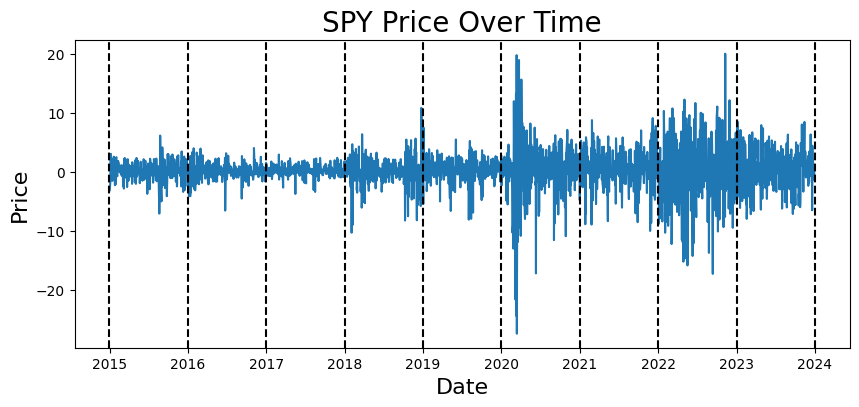

In [37]:
plt.figure(figsize = (10,4))
plt.plot(tickerdf['first_difference'])
plt.title("SPY Price Over Time", fontsize = 20)
plt.ylabel('Price', fontsize = 16)
plt.xlabel('Date', fontsize = 16)
for year in range(2015,2025):
  plt.axvline(pd.to_datetime(f'{year}-01-01'), color = 'k', linestyle = '--')
plt.show()

### ACF

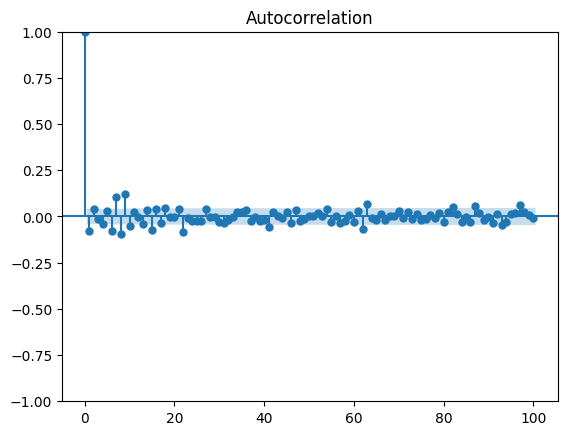

In [38]:
acf_plot = plot_acf(tickerdf.first_difference, lags = 100)

### PACF

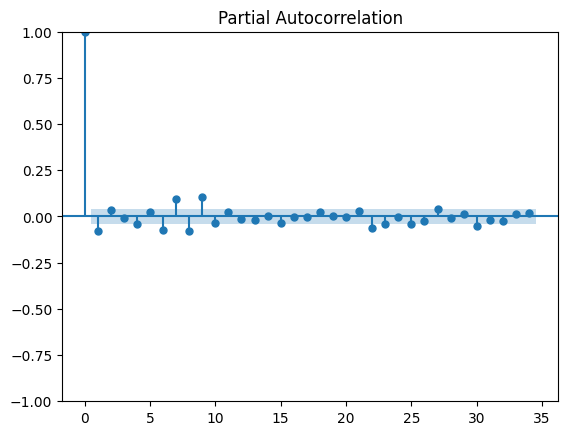

In [39]:
pacf_plot = plot_pacf(tickerdf.first_difference)